# The Basics

In this notebook, you will build your first **anywidget** 🎸.

The goal of this section is to teach you the core APIs and concepts for creating an anywidget, namely:

- The front-end `render` function: Display content on the screen and communicate with Python.
- Traitlets: Share data variables between Python and JavaScript.
- Apply styles to a widget.
- Import third-party JavaScript dependencies.

With these basics, you'll be ready to start building interactive anywidgets of your own.

We'll start by importing anywidget and traitlets:

In [1]:
import anywidget
import traitlets

## 1. Hello, Widget

The most essential components of an custom anywidget are **ESM** front-end code and **traitlets**. 
The `AnyWidget` class combines these into one object, letting you define a widget inline in a few lines of code.

The shape of a custom widget will look something like this:

```python
class MyCustomWidget(anywidget.AnyWidget):
    _esm = """
    function render() { }
    export default { render };
    """
    some_data = traitlets.Int().tag(sync=True)
    some_other_data = traitlets.Unicode().tag(sync=True)
```

Let's take a look at these pieces, one at a time.

### The `render` function

**anywidget**'s primary requirement is that you define `_esm`, a standard JavaScript module to be executed in the notebook front end. In the notebook, we can easily write a bit of this code as an inline string.

The `_esm` _exports_ a special function called `render`, which the notebook front-end 
will execute anytime the widget is displayed.

#### Running some JavaScript 
Let's add the boilerplate to make a custom widget:

**Exercise 1**: Here we have a basic scaffold for a widget. In the front-end code, use [`console.log`](https://developer.mozilla.org/en-US/docs/Web/API/console/log_static) to print "Hello from anywidget!" to the 
browser console. When you have finished, open the [Chrome Developer Tools](https://developer.chrome.com/docs/devtools/open):

- Windows or Linux: `Ctrl + Shift + J`
- Mac `Cmd + Option + J`

After running the cell, open the Console and check for the message "Hello from anywidget!". Keep `console.log` in your back pocket as it will be helpful for debugging and inspecting code in the front end.

In [2]:
# Exercise 1

class Widget(anywidget.AnyWidget):
    _esm = """
    function render() {
      // Task: print "Hello from anywidget!" to the browser console
      
    }
    export default { render }
    """
    
Widget()

Widget()

In [4]:
%load ./answers/02-01.py

Widget()

#### Creating and appending DOM elements

Ok, so we got some code to run, nice. For some of you, that might be the first JavaScript you've ever written!

But nothing shows up on the screen. Remember, we want to display something for the class we are creating in the notebook output. The `render` function is responsible for **creating** the front-end content to display for our widget and **appending** that content to the web page's [Document Object Model](https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model) (DOM).

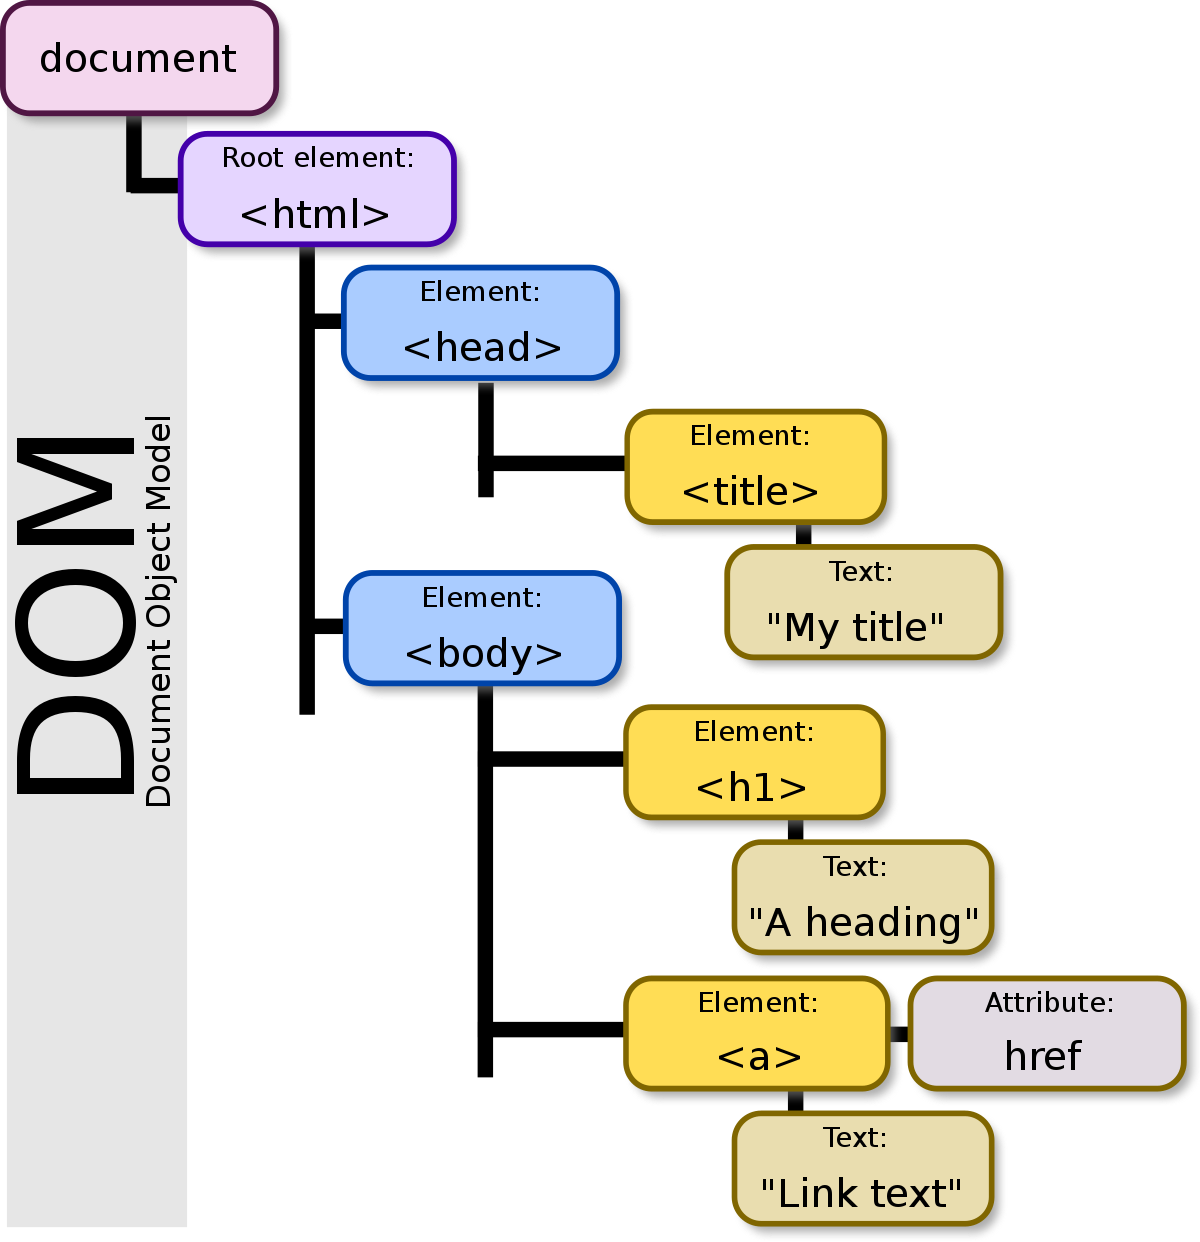

We can **create** elements in JavaScript via [`document.createElement`](https://developer.mozilla.org/en-US/docs/Web/API/Document/createElement), which creates new [HTML elements](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) for the page. For example, we can create a paragraph element and set its inner text as follows:

```js
const p = document.createElement("p");
p.innerText = "Hello, anywidget";
```

To view this new paragraph element, it needs to be **appended** to another HTML element currently in the DOM. For example, we could append this to the current web page body with:

```js
document.body.appendChild(p);
```

However, for our widget, we probably don't want to append to the body because that's not where we want the output (it would be at the bottom of the page). Instead, it would be nice if we had access to the HTML element where the notebook output cell is for our widget. Well we do:

```js
function render({ el }) {
               // ^ HTMLElement for the notebook cell output for our widget
}
export default { render };
```

The `render` function gets `el` as an argument, which is the HTML element for the notebook cell output. This allows us to append any content we create directly to the cell output area.

**Exercise 2**: In the `render` function above:

- Create an `h1` header element
- Set the text to "Hello anywidget!"
- Append the element you created to the notebook output

When finished, run the cell and you should see "Hello, anywidget!" in large bold letters.

In [5]:
# Exercise 2

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ el }) {

    }
    export default { render };
    """

Widget()

Widget()

In [7]:
%load ./answers/02-02.py

Widget()

### Getting data from Python

So far, everything we have done is entirely in the front end. If we wanted to update the `h1` we created 
above, we'd need to edit the `class` definiton itself and redefine a new `_esm` string.

On the Python side, **traitlets** give us the ability to declare pieces of data (or "state") on
our widget that should be share _and_ synchronized between Python and JavaScript.

For example, we can define an integer attribute `my_value`:

```python
class Widget(anywidget.AnyWidget):
    _esm = "..."
    my_value = traitlets.Int(0).tag(sync=True)
```

> Note: the `sync=True` metadata for the traitlet is required to have the data

Which we can initialize and/or update on the Python side:

```python
widget = Widget(my_value=42)

widget.my_value = 123
```

On the front end, we can access `my_value` trait through the `model`, another object provided through 
the `render` function:

```javascript
function render({ model, el }) {
    let my_value = model.get("my_value"); // get the current value
}
```

Let's try to update our previous widget to use traitlets!

**Exercise 3**: Convert the above widget to use traitlets 

- Create a string `name` traitlet
- Get the `name` in the front end and display "Hello, \<name\>!"

> Hint: The traitlet for strings is [`Unicode`](https://traitlets.readthedocs.io/en/stable/trait_types.html#strings)

In [8]:
# Exercise 3

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const h1 = document.createElement("h1");
        h1.innerText = "Hello, anywidget!";
        el.appendChild(h1);
    }
    export default { render };
    """

Widget()

Widget()

In [10]:
%load ./answers/02-03.py

Widget(name='World')

### Conclusion

You've now learned the two core APIs in the `anywidget` front end: `model` and `el`.

Together, they provide the minimal set of APIs for building notebook integrations, boiling down to:

- Communicating with the Jupyter Kernel (`model`)
- Modifying the notebook output cells in the DOM (`el`)



## 2. Counter button


In this section, we will create a counter widget. The counter keeps an integer count, which is synchronized between the front end and kernel. Any time the button is clicked in the front end, the count increments by 1 in Python as well. If the count is set in Python, it updates the front end.

This simple example is in the **anywidget** documentation because it demonstrates a core concept succinctly: two-way data binding.

We'll build the example from scratch and explain what two-way data binding is.

**Exercise 4**: Setup a button

- Change the `h1` into a `button` element
- Change the `name` traitlet to an integer `count`
- Set the text of the `button` to be "Count is \<count\>"

In [11]:
# Excercise 4

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const h1 = document.createElement("h1");
        h1.innerText = `Hello, ${model.get("name")}`;
        el.appendChild(h1);
    }

    export default { render };
    """
    name = traitlets.Unicode().tag(sync=True)

Widget()

Widget()

In [16]:
%load ./answers/02-04.py

Widget()

### Monitoring clicks

To track button clicks, we need to subscribe to ["click" events](https://developer.mozilla.org/en-US/docs/Web/API/Element/click_event) on the `button` element. All HTML elements are web [`EventTarget`](https://developer.mozilla.org/en-US/docs/Web/API/EventTarget)s, so we can use the [`addEventListener` API](https://developer.mozilla.org/en-US/docs/Web/API/EventTarget/addEventListener) to subscribe a callback, which executes any time the event occurs (i.e., a "click").

For example, we can add a "click" event listener to the `body` of the current page:

```javascript
document.body.addEventListener("click", () => {
    console.log("clicked the body element.")
});
```

and log to the console anytime the page is clicked.

If you are new to JavaScript, this `() => {}` notation might be a bit confusing. These are called _arrow 
functions_ (hence the `=>`) and provide a more succinct way to write functions (simliar to Python `lambda`). The above is functionally equivalent to:

```javascript
document.body.addEventListener("click", function () {
    console.log("clicked the body element.")
});
```

Click is just one type of event you can monitor for an element; there are many more like `mouseover`, `keydown`, etc.

**Exercise 5**: 

- Add an "click" event listener to our `button`
- console.log "clicked" every time the button is clicked

In [17]:
# Excercise 5

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        el.appendChild(btn);
    }

    export default { render };
    """
    count = traitlets.Int().tag(sync=True)

Widget()

Widget()

In [18]:
%load ./answers/02-05.py

Widget()

### Sending count to Python

So far we've received data from Python, but we haven't set anything back. Remember the `model` is responsible for communicating with the kernel. 

Not only does it support _getting_ state but also _setting_ state:

```javascript
function render({ model, el }) {
    model.set("my_value", 42); // set the value in the front end
    model.save_changes();      // synchronize the current state with Python
}
```

Let's update our counter to set the model state for count.

**Exercise 6**: Within the event listener:

- Set the "count" on the model to the value plus one (i.e., increment the count)
- Save the changes with Python to sync the model

If done correctly, we chould we able to click the button in the front 
end and see `widget.count` change when we run the notebook cell.


In [19]:
# Excercise 6

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        btn.addEventListener("click", () => {
            console.log("clicked");
        });
        el.appendChild(btn);
    }
    export default { render };
    """
    count = traitlets.Int().tag(sync=True)

widget = Widget()
widget

Widget()

In [22]:
widget.count # click the button a few of times and then run this cell

5

In [21]:
%load ./answers/02-06.py

Widget()

### Closing the loop

Our button is getting close, but notice that we are never updating the text in the 
front end when the count changes.

Perhaps we could also set the `innerText` in the event listener:


In [23]:
class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        btn.addEventListener("click", () => {
            const new_count = model.get("count") + 1;
            btn.innerText = `Count is ${new_count}`;
            model.set("count", new_count);
            model.save_changes();
        });
        el.appendChild(btn);
    }

    export default { render };
    """
    count = traitlets.Int().tag(sync=True)

widget = Widget()
widget

Widget()

This seems to work fine. When we click the button, it increments in the UI.

Can anyone spot the bug?

Remember that widgets also respond to events from the kernel. We haven't written any code in to respond to those changes, only click events in the front end.

Instead, we should use the `model.on` method to listen for changes to the `count`. 


For example, we can subscribe to changes for a trait called `my_value` with:


```javascript
function render({ model, el }) {
    
    model.on("change:my_value", () => {
        let update = model.get("my_value");
        // do something with the update
    });
    
}
```


In the snippet above, the event handler is called whenever `my_value` is updated from either 
Python or the front-end code. 

**By treating the `model` as the source of truth, regardless 
of whether `my_value` is updated on the  Python side or the JavaScript side, `my_value` 
stays up to date and correct.**


**Exercise 7**: Let's fix this bug!

- Use `model.on` to listen to changes for `count` and update the displayed count

Once completed you should be able to run the cell above, and update the count from the cell below:

In [24]:
# Exercise 7

class Widget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        btn.addEventListener("click", () => {
            const new_count = model.get("count") + 1;
            btn.innerText = `Count is ${new_count}`;
            model.set("count", new_count);
            model.save_changes();
        });
        el.appendChild(btn);
    }

    export default { render };
    """
    count = traitlets.Int().tag(sync=True)

widget = Widget()
widget

Widget()

In [27]:
widget.count = 42 # should update the above UI to "Count is 42"

In [26]:
%load ./answers/02-07.py

Widget()

### Make it pretty 💅

**anywidget** also has an API for styling to your widgets with CSS. We don't have time to go too deep into the exercises here, but similar to `_esm`, you can provide CSS stylesheets through `_css`, and **anwyidget** will take care of applying them to the DOM.

One important note: currently, **anywidget** appends styles to the root of the document, which means you could override other styles.

To avoid this, it's best practice to add a CSS class in JavaScript to the root `el`, and then write your styles in a way that is scoped to that element or class.

There are plenty of resources to learn more about CSS (LLMs are good at it too), but below you can try changing the font size, background color, etc.

In [28]:
import anywidget
import traitlets

class StyledWidget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        btn.addEventListener("click", () => {
            model.set("count", model.get("count") + 1);
            model.save_changes();
        });
        model.on("change:count", () => {
            btn.innerText = `Count is ${model.get("count")}`;
        });
        el.appendChild(btn);
        el.classList.add("styled-widget");
    }
    export default { render };
    """
    _css = """
    .styled-widget button {
        font-size: 20px;
        background-color: #4CAF50;
        color: white;
        padding: 10px 24px;
        border: none;
        cursor: pointer;
    }
    .styled-widget button:hover {
        background-color: #45a049;
    }
    """
    count = traitlets.Int(0).tag(sync=True)

StyledWidget()

StyledWidget()

In [30]:
%load ./answers/02-08.py

StyledWidgetAnswer()

### Third-party libraries

So far everything we've done has been using vanilla JS and APIs that are built into the browser. However, there is a _huge_ ecosystem of interactive JavaScript vsiauzation libraries and tools that can we connected with notebooks as widgets.

ECMAScript modules are the offical standard format to package JavaScript code for reuse and are supported natively across all major browsers. Therefore, dependencies can be imported directly via a fully qualified URL.


For example, you can use the popular `d3` visualization library with anywidget just by including an IMPORT from a ESM friendly CDN:

```javascript
import * as d3 from "https://esm.sh/d3@7";

function render({ model, el }) {
	let selection = d3.select(el);
	/* ... */
}
export default { render };
```

A fun little library is `canvas-confetti`, which is confetti cannon. You can import it in ESM:

```javascript
import confetti from "https://esm.sh/canvas-confetti@1";

confetti() // 🎉🎉🎉
```

**Exercise 9**: Modify the widget above to shoot confetti any time the count changes

> **Bonus**: The `confetti` function takes an object as an argument with `confetti({ angle: <number> })`. See if you can do something fun with the count and the angle.

In [32]:
# Exercise 9

class ConfettiWidget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
        const btn = document.createElement("button");
        btn.innerText = `Count is ${model.get("count")}`;
        btn.addEventListener("click", () => {
            model.set("count", model.get("count") + 1);
            model.save_changes();
        });
        model.on("change:count", () => {
            btn.innerText = `Count is ${model.get("count")}`;
        });
        el.appendChild(btn);
    }
    export default { render };
    """
    count = traitlets.Int(0).tag(sync=True)

ConfettiWidget()

ConfettiWidget()

In [34]:
%load ./answers/02-09.py

ConfettiWidget()

## Composition with ipywidgets

The widgets we've created in this notebook will work in many notebook environments. You can copy and paste the code above directly into Google Colab, and it will just work. Give it a try!

Additionally, since **anywidget** shares an architecture with `ipywidgets`, they can be composed together in notebooks. This means you can pip install anywidgets and ipywidgets and connect them in interesting ways.

For example, we can link a slider to our counter button:

In [35]:
import ipywidgets

button = ConfettiWidget()
button

ConfettiWidget()

In [36]:
ipywidgets.IntSlider()

IntSlider(value=0)

In [37]:
ipywidgets.link((button, "count"), (_, "value"))